In [1]:
#Burası github dan denediğin proje

Categorized Theme Counts:
Categorized Color Counts:
pink: 1
silver: 4
darkgray: 2
gray: 1
sienna: 1
black: 3
dimgray: 4
darkolivegreen: 3
tan: 4
darkslategray: 4
rosybrown: 2


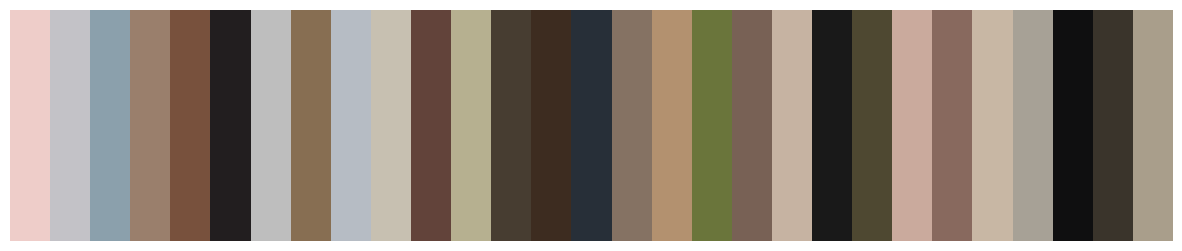

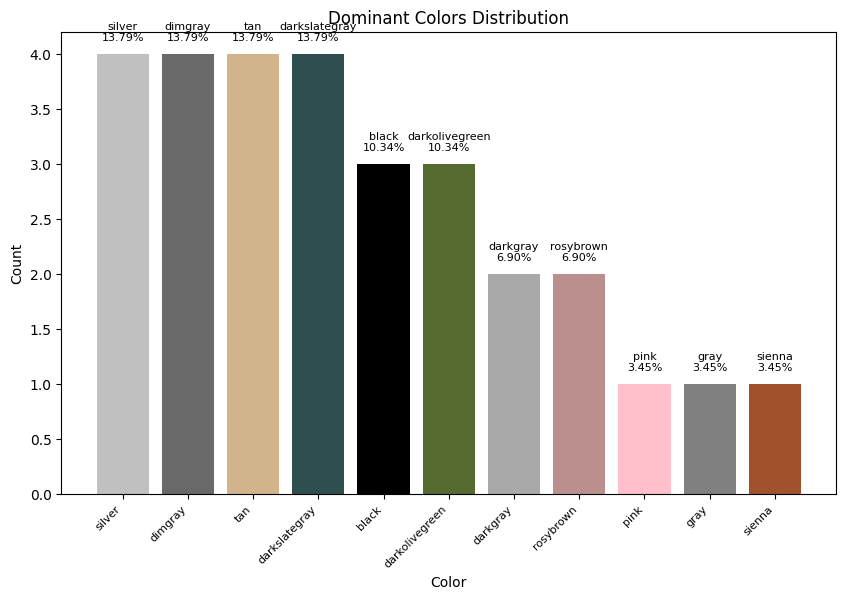

No themes found.


In [13]:
import os
from bs4 import BeautifulSoup
import requests
from io import BytesIO
from PIL import Image
from colorthief import ColorThief
import colorsys
import matplotlib.pyplot as plt
from collections import Counter
import webcolors
import matplotlib.pyplot as plt

def closest_color(rgb):
    differences = {}
    for color_hex, color_name in webcolors.CSS3_HEX_TO_NAMES.items():
        r,g,b = webcolors.hex_to_rgb(color_hex)
        differences[sum([(r- rgb[0]) ** 2,
                         (g - rgb[1]) ** 2,
                         (b - rgb[2]) ** 2])] = color_name
    return differences[min(differences.keys())]

# Dictionary to store the counts of dominant colors
dominant_color_counts = Counter()

# Replace 'PATH_TO_YOUR_HTML_FILE' with the actual path to your saved Pinterest HTML file
html_file_path = "C:/Users/alica/OneDrive - sabanciuniv.edu/Masaüstü/Cansu/Sophmore 2/CS210/ucuncuPinterest.html"

# Get the directory of the HTML file
html_file_directory = os.path.dirname(html_file_path)

with open(html_file_path, 'r', encoding='utf-8') as file:
    content = file.read()

soup = BeautifulSoup(content, 'html.parser')
 
# Find all image elements on the page
image_elements = soup.find_all('img')

# Extract image URLs
image_urls = [img['src'] for img in image_elements if 'src' in img.attrs]

# List to store the dominant colors for each image
all_dominant_colors = []







# Analyze dominant colors for each image
for image_url in image_urls:
    # Construct the full file path
    image_path = os.path.join(html_file_directory, image_url.replace('/', '\\'))

    # Using ColorThief for dominant color analysis
    ct = ColorThief(image_path)

    dominant_color = ct.get_color(quality=1)

    # Add the dominant color to the Counter
    dominant_color_counts[dominant_color] += 1
    all_dominant_colors.append(dominant_color)




    # Plot and display the dominant color
    #plt.imshow([[dominant_color]])
    #plt.show()

    # Get color palette
    #palette = ct.get_palette(color_count=5)
    
    # Plot and display the color palette
    #plt.imshow([[palette[i] for i in range(5)]])
    #plt.show()

    # Print color information for each color in the palette
    #for color in palette:
    #    print(color)
    #    print(f"#{color[0]:02x}{color[1]:02x}{color[2]:02x}")
    #    print(colorsys.rgb_to_hsv(*color))
    #    print(colorsys.rgb_to_hls(*color))

    #    plt.imshow([[color]])
    #    plt.show()

    #    try: 
    #        cname = webcolors.rgb_to_name(color)
    #        print(f"The color is exactly {cname}")
    #    except ValueError:
    #        cname = closest_color(color)
     #       print(f"The color is closest to {cname}")

# Find the most dominant color across all images
# Find the most dominant color across all images
most_common_color = dominant_color_counts.most_common(1)[0][0]







##############################3

# Display the categorized colors and write to a file
categorized_colors = [closest_color(color) for color in all_dominant_colors]
color_counts = Counter(categorized_colors)

print("Categorized Color Counts:")
for color, count in color_counts.items():
    print(f"{color}: {count}")
    





# Display all dominant colors in one graph if there are more than one image
if len(all_dominant_colors) > 1:
    fig, ax = plt.subplots(figsize=(15, 3))

    # Convert to a NumPy array
    color_array = all_dominant_colors

    # Plot and display the colors using the 'viridis' colormap
    ax.imshow([color_array], cmap='viridis', aspect='auto')
    ax.axis('off')
    plt.show()
else:
    print("Not enough images to create a graph.")


# Get the total number of images
total_images = len(all_dominant_colors)

# Calculate the percentages
percentages = {color: count / total_images * 100 for color, count in color_counts.items()}

# Sort the colors by count in descending order
sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)

# Extract information for plotting
colors = [color[0] for color in sorted_colors]
counts = [color[1] for color in sorted_colors]
percentages = [percentages[color] for color in colors]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(range(len(colors)), counts, color=colors)

# Annotate with color names and percentages
for bar, color, percentage in zip(bars, colors, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{color}\n{percentage:.2f}%", 
             ha='center', va='bottom', rotation=0, fontsize=8, color='black')

# Customize the plot
plt.xticks(range(len(colors)), colors, rotation=45, ha='right', fontsize=8)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Dominant Colors Distribution')

# Show the plot
plt.show()



In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions

# Specify the path to the ChromeDriver executable
chrome_driver_path = 'C:/Users/alica/Downloads/chromedriver_win32/chromedriver.exe'  # Replace with the actual path to chromedriver.exe

# Set up Selenium WebDriver with the specified path
chrome_options = ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

chrome_service = ChromeService(chrome_driver_path)  # Corrected line
driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

driver.get(f'file://{html_file_path}')  # Load the local HTML file

# Replace 'PATH_TO_YOUR_HTML_FILE' with the actual path to your saved Pinterest HTML file
html_file_path = "C:/Users/alica/OneDrive - sabanciuniv.edu/Masaüstü/Cansu/Sophmore 2/CS210/ucuncuPinterest.html"

# Scroll down to load more content (you may need to adjust the number of scrolls)
scroll_count = 5
for _ in range(scroll_count):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # You may need to adjust this wait time

# Click on each image to reveal the theme information
board_elements = driver.find_elements(By.CLASS_NAME, 'XbT')
for board_element in board_elements:
    board_element.click()
    time.sleep(1)  # You may need to adjust this wait time

# Get the updated page source after dynamic content is loaded
content = driver.page_source

# Continue with BeautifulSoup to extract the theme information
soup = BeautifulSoup(content, 'html.parser')

# Find all div elements with class "tBJ dyH iFc sAJ O2T zDA IZT H2s CKL" inside "XbT" class
theme_elements = soup.select('.XbT .tBJ.dyH.iFc.sAJ.O2T.zDA.IZT.H2s.CKL')

# Extract themes from the title attribute
themes = [theme.get('title') for theme in theme_elements]

# Create a dictionary to store the counts of themes
theme_counts = Counter(themes)

# Display the categorized themes and write to a file
print("Categorized Theme Counts:")
for theme, count in theme_counts.items():
    print(f"{theme}: {count}")

# Display all themes in one graph
if theme_counts:
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot and display the themes using the 'viridis' colormap
    ax.bar(theme_counts.keys(), theme_counts.values(), color='viridis')
    ax.set_ylabel('Count')
    ax.set_title('Themes Distribution')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.show()
else:
    print("No themes found.")

# Close the WebDriver
driver.quit()


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 120.0.6099.217 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x009CA813+48355]
	(No symbol) [0x0095C4B1]
	(No symbol) [0x00865358]
	(No symbol) [0x008861AC]
	(No symbol) [0x00881EF3]
	(No symbol) [0x00880579]
	(No symbol) [0x008B0C55]
	(No symbol) [0x008B093C]
	(No symbol) [0x008AA536]
	(No symbol) [0x008882DC]
	(No symbol) [0x008893DD]
	GetHandleVerifier [0x00C2AABD+2539405]
	GetHandleVerifier [0x00C6A78F+2800735]
	GetHandleVerifier [0x00C6456C+2775612]
	GetHandleVerifier [0x00A551E0+616112]
	(No symbol) [0x00965F8C]
	(No symbol) [0x00962328]
	(No symbol) [0x0096240B]
	(No symbol) [0x00954FF7]
	BaseThreadInitThunk [0x778FFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77D07C6E+286]
	RtlGetAppContainerNamedObjectPath [0x77D07C3E+238]
